In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# import warnings
# warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [3]:
path = './project2/'
file_list = ['A','B','E','F']
filename = '_lvr_land_A.csv'


In [4]:
a = pd.read_csv(path+str(file_list[0])+filename,encoding='utf-8')
b = pd.read_csv(path+str(file_list[1])+filename,encoding='utf-8')
e = pd.read_csv(path+str(file_list[2])+filename,encoding='utf-8')
f = pd.read_csv(path+str(file_list[3])+filename,encoding='utf-8')

/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,7,14,15,16,17,18,21,22,24,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
a = a.iloc[1:,:].reset_index(drop=True)
b = b.iloc[1:,:].reset_index(drop=True)
e = e.iloc[1:,:].reset_index(drop=True)
f = f.iloc[1:,:].reset_index(drop=True)

In [6]:
df = pd.concat([a,b,e,f]).reset_index(drop=True)

In [7]:
df.describe()

,主建物面積,附屬建物面積,陽台面積
count,59476.000000,59476.000000,59476.000000
mean,79.128890,5.470561,3.220769
std,165.318619,10.075095,5.753949
min,0.000000,0.000000,0.000000
25%,32.847500,0.000000,0.000000
50%,69.360000,1.470000,0.000000
75%,96.432500,8.370000,5.230000
max,25959.340000,908.560000,176.690000


In [8]:
df.columns

Index(['鄉鎮市區', '交易標的', '土地區段位置建物區段門牌', '土地移轉總面積平方公尺', '都市土地使用分區', '非都市土地使用分區',
       '非都市土地使用編定', '交易年月日', '交易筆棟數', '移轉層次', '總樓層數', '建物型態', '主要用途', '主要建材',
       '建築完成年月', '建物移轉總面積平方公尺', '建物現況格局-房', '建物現況格局-廳', '建物現況格局-衛',
       '建物現況格局-隔間', '有無管理組織', '總價元', '單價元平方公尺', '車位類別', '車位移轉總面積(平方公尺)',
       '車位總價元', '備註', '編號', '主建物面積', '附屬建物面積', '陽台面積', '電梯'],
      dtype='object')

In [9]:
for i in df.columns:
    print(f"{i}'s unique values")
    print(df[i].unique(),'\n\n')

鄉鎮市區's unique values
['文山區' '中正區' '大同區' '萬華區' '中山區' '內湖區' '信義區' '松山區' '南港區' '北投區' '士林區' '大安區'
 '西區' '南區' '中區' '東區' '北屯區' '北區' '西屯區' '南屯區' '后里區' '豐原區' '神岡區' '外埔區' '大甲區'
 '沙鹿區' '清水區' '東勢區' '大雅區' '潭子區' '烏日區' '大里區' '霧峰區' '太平區' '龍井區' '大肚區' '新社區'
 '梧棲區' '石岡區' '和平區' '鼓山區' '鹽埕區' '前金區' '苓雅區' '新興區' '小港區' '前鎮區' '三民區' '左營區'
 '楠梓區' '梓官區' '岡山區' '燕巢區' '橋頭區' '鳳山區' '大樹區' '旗山區' '鳥松區' '仁武區' '路竹區' '阿蓮區'
 '湖內區' '美濃區' '桃源區' '大寮區' '林園區' '內門區' '茄萣區' '田寮區' '大社區' '永安區' '旗津區' '彌陀區'
 '那瑪夏區' '杉林區' '六龜區' '甲仙區' '板橋區' '新莊區' '林口區' '五股區' '泰山區' '新店區' '汐止區' '淡水區'
 '八里區' '貢寮區' '三重區' '蘆洲區' '永和區' '中和區' '三峽區' '樹林區' '鶯歌區' '土城區' '平溪區' '三芝區'
 '石門區' '金山區' '烏來區' '雙溪區' '深坑區' '瑞芳區' '萬里區' '石碇區' '坪林區'] 


交易標的's unique values
['房地(土地+建物)+車位' '房地(土地+建物)' '土地' '車位' '建物'] 


土地區段位置建物區段門牌's unique values
['臺北市文山區忠順街二段85巷1~30號' '臺北市文山區福興路91~120號' '臺北市文山區木柵路四段121~150號' ...
 '文化北路二段550巷29弄1~30號' '鳳鳴段31~60地號' '成福段成福小段331~360地號'] 


土地移轉總面積平方公尺's unique values
['26.97' '10.32' '39.64' ... 7.62 30.36 762.0] 


都市土地使用分區's unique values
['住' '其他

In [10]:
df[['土地','建物']] = df['交易筆棟數'].str.split('建物', expand=True)
df['土地'] = df['土地'].apply(lambda x: int(x.split('土地')[-1]))
df['車位'] = df['建物'].apply(lambda x: int(x.split('車位')[-1]))
df['建物'] = df['建物'].apply(lambda x: int(x.split('車位')[0]))

In [11]:
df['elevator_移轉'] = df['移轉層次'].apply(lambda x: 1 if '電梯' in str(x)  else 0)
df['elevator_電梯'] = df['電梯'].apply(lambda x:1 if x=='有' else 0)
df['elevator_建築'] = df['建物型態'].apply(lambda x:1 if '有電梯' in str(x) else 0)
df['elevator'] = df['elevator_移轉'] +df['elevator_電梯']+df['elevator_建築'] 
df['elevator'] = df['elevator'] .apply(lambda x: 1 if x>0 else 0)

In [12]:
df['建築完成年月'] = df['建築完成年月'].fillna(0)
df['build_date'] = df['建築完成年月'].apply(lambda x: str(x).split('.')[0] if len(str(x))>=7 else str(0)+str(x))
df['build_date'] = df['build_date'].apply(lambda x:x[:3]+'-'+x[3:5]+'-'+x[5:] if len(x)==7 else None)

In [13]:
df['交易年月日'] = df['交易年月日'].fillna('0')
df['trade_date'] = df['交易年月日'].apply(lambda x: str(x).split('.')[0] if len(str(x))>=7 else str(0)+str(x))
df['trade_date'] = df['trade_date'].apply(lambda x:x[:3]+'-'+x[3:5]+'-'+x[5:] if x !='00' else None)

In [14]:
[(df[df['交易年月日'] =='1190811'].index)]

[Int64Index([24132], dtype='int64')]

In [15]:
df['交易年月日'][24132]='1090811'

/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df['year'] = df['交易年月日'].apply(lambda x: int(str(x)[:-4])+1911)

In [17]:
df['room'] = df['建物現況格局-房'].apply(lambda x: int(x))
df['hall'] = df['建物現況格局-廳'].apply(lambda x: int(x))
df['restroom'] = df['建物現況格局-衛'].apply(lambda x: int(x))

In [18]:
df['土地移轉總面積平方公尺'] = df['土地移轉總面積平方公尺'].apply(lambda x: float(x))
df['總價元'] = df['總價元'].apply(lambda x: int(x))
df['單價元平方公尺'] = df['單價元平方公尺'].apply(lambda x: float(x))
df['車位移轉總面積(平方公尺)'] = df['車位移轉總面積(平方公尺)'].apply(lambda x: float(x))
df['車位總價元'] = df['車位總價元'].apply(lambda x: int(x))
df['建物移轉總面積平方公尺'] = df['建物移轉總面積平方公尺'].apply(lambda x: float(x))
df['單價元平方公尺'] = df['單價元平方公尺'].astype(float)
df['單價元坪'] = df['單價元平方公尺'] * 3.30579

In [19]:
# 總樓層數

In [20]:
level = {'十五層':15, '六層':6, '十九層':19, '十四層':14, '七層':7, '五層':5, '十二層':12, '十三層':13, '四層':4,
                                    '三層':3, '九層':9, '十層':10, '八層':8,
 '一層':1, '十八層':18, '二十七層':27, '二十四層':24, '十一層':11, '十七層':17, '二層':2, '十六層':16,
                                '二十三層':23, '二十二層':22, '二十層':20,
 '二十一層':21, '三十八層':38, '二十六層':26, '三十三層':33, '二十九層':29, '二十五層':25, '三十層':30,
                            '二十八層':28, '三十一層':31, '四十二層':42,
 '三十二層':32, '見其他登記事項':'other', '四十一層':41, '三十九層':39, '三十五層':35, '三十六層':36, '三十四層':34, '三十七層':37, '八十五層':85, '五十層':50,
 '六十八層':68, '四十三層':43, '四十層' :40,'四十六層':46, '000':0,0:0}

In [21]:
df['總樓層數'] = df['總樓層數'].fillna(0).apply(lambda x: level[x] )

In [22]:
df['sale_price'] = np.log10(df['總價元']+1)
df['sale_price_ping'] = np.log10(df['單價元坪']+1)

In [23]:
df = df.drop(['交易筆棟數','土地區段位置建物區段門牌','電梯','備註',
              '移轉層次','編號','建物現況格局-房','建物現況格局-廳',
              '建物現況格局-衛','建築完成年月','交易年月日','elevator_移轉',
             'elevator_電梯','elevator_建築','總價元','單價元坪'],axis=1)

In [24]:
for i in df.columns:
    print(f"{i}'s unique values")
    print(df[i].unique(),'\n\n')

鄉鎮市區's unique values
['文山區' '中正區' '大同區' '萬華區' '中山區' '內湖區' '信義區' '松山區' '南港區' '北投區' '士林區' '大安區'
 '西區' '南區' '中區' '東區' '北屯區' '北區' '西屯區' '南屯區' '后里區' '豐原區' '神岡區' '外埔區' '大甲區'
 '沙鹿區' '清水區' '東勢區' '大雅區' '潭子區' '烏日區' '大里區' '霧峰區' '太平區' '龍井區' '大肚區' '新社區'
 '梧棲區' '石岡區' '和平區' '鼓山區' '鹽埕區' '前金區' '苓雅區' '新興區' '小港區' '前鎮區' '三民區' '左營區'
 '楠梓區' '梓官區' '岡山區' '燕巢區' '橋頭區' '鳳山區' '大樹區' '旗山區' '鳥松區' '仁武區' '路竹區' '阿蓮區'
 '湖內區' '美濃區' '桃源區' '大寮區' '林園區' '內門區' '茄萣區' '田寮區' '大社區' '永安區' '旗津區' '彌陀區'
 '那瑪夏區' '杉林區' '六龜區' '甲仙區' '板橋區' '新莊區' '林口區' '五股區' '泰山區' '新店區' '汐止區' '淡水區'
 '八里區' '貢寮區' '三重區' '蘆洲區' '永和區' '中和區' '三峽區' '樹林區' '鶯歌區' '土城區' '平溪區' '三芝區'
 '石門區' '金山區' '烏來區' '雙溪區' '深坑區' '瑞芳區' '萬里區' '石碇區' '坪林區'] 


交易標的's unique values
['房地(土地+建物)+車位' '房地(土地+建物)' '土地' '車位' '建物'] 


土地移轉總面積平方公尺's unique values
[  26.97   10.32   39.64 ...  717.   1453.79  102.72] 


都市土地使用分區's unique values
['住' '其他' '商' '工' '農' nan] 


非都市土地使用分區's unique values
[nan '特定農業區' '山坡地保育區' '一般農業區' '鄉村區' '工業區' '森林區' '風景區' '特定專用區' '住宅區' '河川區'
 '國家公園區'] 


非都市土地使用編定's u

In [25]:
# 確定只有 int64, float64, object 三種類型後對欄位名稱執行迴圈, 分別將欄位名稱存於三個 list 中
int_features = []
float_features = []
object_features = []
# .dtypes(欄位類型), .columns(欄位名稱) 是 DataFrame 提供的兩個方法, 這裡順便展示一下 for 與 zip 搭配的用法
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64':
        float_features.append(feature)
    elif dtype == 'int64':
        int_features.append(feature)
    else:
        object_features.append(feature)
# 這邊採用的寫法稱為 f-string, 是 Python 3.6.2 以後版本才出現的
# 如果無法執行, 則需要更新到這個版本之後, 或自行將程式改寫為 str.format 形式
# 改寫方式可以參考 https://blog.louie.lu/2017/08/08/outdate-python-string-format-and-fstring/
print(f'{len(int_features)} Integer Features : {int_features}\n')
print(f'{len(float_features)} Float Features : {float_features}\n')
print(f'{len(object_features)} Object Features : {object_features}')

9 Integer Features : ['車位總價元', '土地', '建物', '車位', 'elevator', 'year', 'room', 'hall', 'restroom']

9 Float Features : ['土地移轉總面積平方公尺', '建物移轉總面積平方公尺', '單價元平方公尺', '車位移轉總面積(平方公尺)', '主建物面積', '附屬建物面積', '陽台面積', 'sale_price', 'sale_price_ping']

14 Object Features : ['鄉鎮市區', '交易標的', '都市土地使用分區', '非都市土地使用分區', '非都市土地使用編定', '總樓層數', '建物型態', '主要用途', '主要建材', '建物現況格局-隔間', '有無管理組織', '車位類別', 'build_date', 'trade_date']


In [26]:
df.describe()

,土地移轉總面積平方公尺,建物移轉總面積平方公尺,單價元平方公尺,車位移轉總面積(平方公尺),車位總價元,主建物面積,附屬建物面積,陽台面積,土地,建物,車位,elevator,year,room,hall,restroom,sale_price,sale_price_ping
count,59476.000000,59476.000000,5.815600e+04,59476.000000,5.947600e+04,59476.000000,59476.000000,59476.000000,59476.000000,59476.000000,59476.000000,59476.000000,59476.000000,59476.000000,59476.000000,59476.000000,59476.000000,58156.000000
mean,145.443272,124.603871,9.200838e+04,11.433944,4.140896e+05,79.128890,5.470561,3.220769,1.470862,0.860347,0.486650,0.563605,2019.809284,2.304526,1.395756,1.559436,6.891827,5.326448
std,1122.407017,218.393775,7.702750e+04,102.803275,1.276343e+06,165.318619,10.075095,5.753949,1.540183,0.513099,1.099737,0.495942,0.799156,1.993678,1.018556,1.716242,0.533653,0.551974
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.530000,59.130000,4.887975e+04,0.000000,0.000000e+00,32.847500,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2020.000000,1.000000,1.000000,1.000000,6.698970,5.208407
50%,23.270000,109.855000,7.313950e+04,0.000000,0.000000e+00,69.360000,1.470000,0.000000,1.000000,1.000000,0.000000,1.000000,2020.000000,3.000000,2.000000,2.000000,6.954243,5.383429
75%,48.282500,163.080000,1.173262e+05,22.570000,0.000000e+00,96.432500,8.370000,5.230000,1.000000,1.000000,1.000000,1.000000,2020.000000,3.000000,2.000000,2.000000,7.181844,5.588672
max,92543.650000,25959.340000,2.320415e+06,24382.000000,1.795000e+08,25959.340000,908.560000,176.690000,86.000000,32.000000,103.000000,1.000000,2020.000000,81.000000,60.000000,81.000000,10.451587,6.884841


In [27]:
cats = pd.qcut(df['sale_price'],5)
cats.value_counts()

(6.869, 7.041]     12139
(6.609, 6.869]     11947
(-0.001, 6.609]    11899
(7.243, 10.452]    11798
(7.041, 7.243]     11693
Name: sale_price, dtype: int64

In [28]:
cats = pd.qcut(df['sale_price_ping'],5)
cats.value_counts()

(-0.001, 5.164]    11633
(5.635, 6.885]     11631
(5.458, 5.635]     11631
(5.317, 5.458]     11631
(5.164, 5.317]     11630
Name: sale_price_ping, dtype: int64

Text(0.5, 0, 'sale_price')

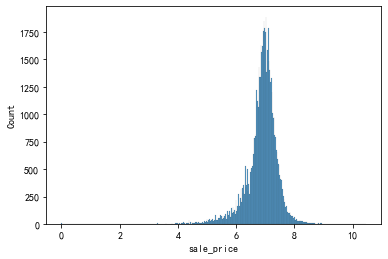

In [29]:
sns.histplot(df[df['sale_price'].notnull()]['sale_price'])
plt.xlabel('sale_price')

Text(0.5, 0, 'sale_price_ping')

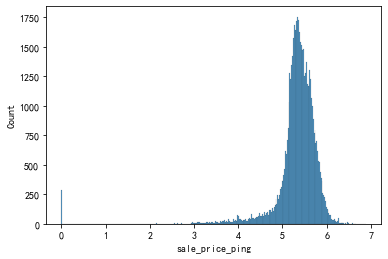

In [30]:
sns.histplot(df[df['sale_price_ping'].notnull()]['sale_price_ping'])
plt.xlabel('sale_price_ping')